In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # 
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
import tensorflow as tf

data = pd.read_csv("/content/drive/MyDrive/age_gender.csv")
print(data.shape)
data.head()
data = data.drop("img_name", axis=1)


(23705, 5)


In [ ]:
columns = ["age","gender","ethnicity"]
y = data.drop("pixels", axis = 1)
x = data.drop(columns, axis = 1)
y.head()

,age,ethnicity,gender
0,1,2,0
1,1,2,0
2,1,2,0
3,1,2,0
4,1,2,0


In [ ]:
img_height = 48
img_width = 48

datapoints = data['pixels'].tolist()
X = []
for pixel in datapoints:
    temp = [int(i) for i in pixel.split(' ')]
    temp = np.asarray(temp).reshape(img_width, img_height,1)
    X.append(temp.astype('float32')/255)

X = np.asarray(X)
X.shape

(23705, 48, 48, 1)

GENDER MODEL OLUŞTURMA

In [ ]:
gender = (y["gender"])
gender = np.asarray(gender).astype('float32').reshape((-1,1))
gender.shape

(23705, 1)

In [ ]:
gender=tf.keras.utils.to_categorical(gender)
gender.shape

(23705, 2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, gender, test_size=0.2, random_state=37
)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18964, 48, 48, 1), (4741, 48, 48, 1), (18964, 2), (4741, 2))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers

model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(56, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))



model.add(Flatten())

model.add(Dense(128, activation='relu',))
model.add(Dropout(0.5))

model.add(Dense(56, activation='relu',))
model.add(Dropout(0.5))

model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

history = model.fit(
    X_train, y_train, epochs=100, validation_split=0.1, batch_size=64,
)

Epoch 1/100
267/267 [==============================] - 15s 14ms/step - loss: 0.5735 - accuracy: 0.6851 - val_loss: 0.4093 - val_accuracy: 0.8271
Epoch 2/100
267/267 [==============================] - 4s 13ms/step - loss: 0.4158 - accuracy: 0.8117 - val_loss: 0.3518 - val_accuracy: 0.8498
Epoch 3/100
267/267 [==============================] - 3s 13ms/step - loss: 0.3830 - accuracy: 0.8239 - val_loss: 0.3297 - val_accuracy: 0.8608
Epoch 4/100
267/267 [==============================] - 3s 13ms/step - loss: 0.3599 - accuracy: 0.8407 - val_loss: 0.3303 - val_accuracy: 0.8629
Epoch 5/100
267/267 [==============================] - 3s 13ms/step - loss: 0.3459 - accuracy: 0.8441 - val_loss: 0.3183 - val_accuracy: 0.8608
Epoch 6/100
267/267 [==============================] - 4s 13ms/step - loss: 0.3299 - accuracy: 0.8532 - val_loss: 0.2937 - val_accuracy: 0.8687
Epoch 7/100
267/267 [==============================] - 3s 13ms/step - loss: 0.3274 - accuracy: 0.8550 - val_loss: 0.2923 - val_accuracy

In [ ]:
model.save("emotion_model_v2.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


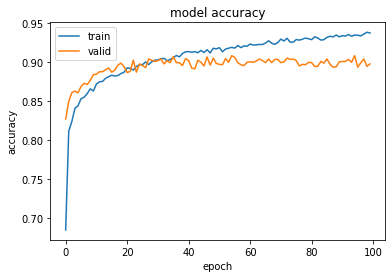

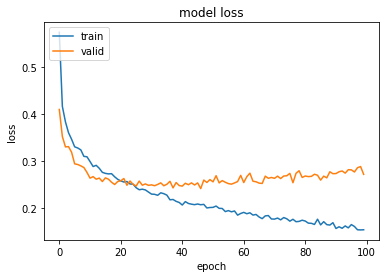

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


In [ ]:

scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

149/149 [==============================] - 1s 5ms/step - loss: 0.2723 - accuracy: 0.8895
Testing Accuracy: 88.95%




ETNİK MODEL OLUŞTURMA

In [ ]:
etnik = data['ethnicity']
etnik=tf.keras.utils.to_categorical(etnik)
X_train, X_test, y_train, y_test = train_test_split(
    X, etnik, test_size=0.22, random_state=37
)

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))



model.add(Flatten())

model.add(Dense(256, activation='relu',))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu',))
model.add(Dropout(0.5))

model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

history = model.fit(
    X_train, y_train, epochs=100, validation_split=0.1, batch_size=64,
)

Epoch 1/100
260/260 [==============================] - 9s 29ms/step - loss: 1.4079 - accuracy: 0.4493 - val_loss: 1.2946 - val_accuracy: 0.4965
Epoch 2/100
260/260 [==============================] - 7s 27ms/step - loss: 1.2072 - accuracy: 0.5361 - val_loss: 1.0223 - val_accuracy: 0.6284
Epoch 3/100
260/260 [==============================] - 7s 27ms/step - loss: 1.0784 - accuracy: 0.5998 - val_loss: 0.9502 - val_accuracy: 0.6609
Epoch 4/100
260/260 [==============================] - 7s 27ms/step - loss: 1.0072 - accuracy: 0.6301 - val_loss: 0.8370 - val_accuracy: 0.7096
Epoch 5/100
260/260 [==============================] - 7s 27ms/step - loss: 0.9557 - accuracy: 0.6535 - val_loss: 0.8255 - val_accuracy: 0.7069
Epoch 6/100
260/260 [==============================] - 7s 26ms/step - loss: 0.9316 - accuracy: 0.6617 - val_loss: 0.8030 - val_accuracy: 0.7204
Epoch 7/100
260/260 [==============================] - 7s 27ms/step - loss: 0.8991 - accuracy: 0.6752 - val_loss: 0.7574 - val_accuracy:

In [ ]:
model.save("etnik_model.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


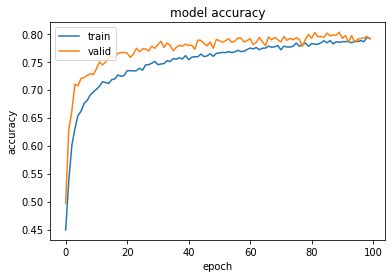

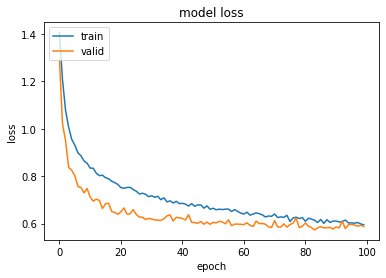

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


In [ ]:

scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

163/163 [==============================] - 2s 8ms/step - loss: 0.5918 - accuracy: 0.7985
Testing Accuracy: 79.85%



AGE MODEL OLUŞTURMA


In [ ]:
data['age'] = data["age"].apply(lambda x: "Teen" if x < 24 else("Middle" if 24 <= x < 55 else "Old"))


In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder_Function = LabelEncoder()
print("MAIN:")
print(data["age"].value_counts())
print("---" * 20)
data["age"] = Encoder_Function.fit_transform(data["age"])
print("TRANSFORMED:")
print(data["age"].value_counts())


MAIN:
Middle    14019
Teen       6044
Old        3642
Name: age, dtype: int64
------------------------------------------------------------
TRANSFORMED:
0    14019
2     6044
1     3642
Name: age, dtype: int64


In [ ]:
age = data['age']
age=tf.keras.utils.to_categorical(age)
X_train, X_test, y_train, y_test = train_test_split(
    X, age, test_size=0.22, random_state=37
)


In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))



model.add(Flatten())

model.add(Dense(256, activation='relu',))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu',))
model.add(Dropout(0.5))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:


history = model.fit(
    X_train, y_train, epochs=100, validation_split=0.1, batch_size=64
)

Epoch 1/100
260/260 [==============================] - 8s 28ms/step - loss: 0.9325 - accuracy: 0.5944 - val_loss: 0.8187 - val_accuracy: 0.6517
Epoch 2/100
260/260 [==============================] - 7s 29ms/step - loss: 0.7607 - accuracy: 0.6821 - val_loss: 0.6701 - val_accuracy: 0.7253
Epoch 3/100
260/260 [==============================] - 7s 28ms/step - loss: 0.6909 - accuracy: 0.7118 - val_loss: 0.6332 - val_accuracy: 0.7534
Epoch 4/100
260/260 [==============================] - 7s 26ms/step - loss: 0.6592 - accuracy: 0.7292 - val_loss: 0.6041 - val_accuracy: 0.7539
Epoch 5/100
260/260 [==============================] - 7s 27ms/step - loss: 0.6333 - accuracy: 0.7419 - val_loss: 0.5833 - val_accuracy: 0.7701
Epoch 6/100
260/260 [==============================] - 7s 27ms/step - loss: 0.6175 - accuracy: 0.7495 - val_loss: 0.5772 - val_accuracy: 0.7696
Epoch 7/100
260/260 [==============================] - 7s 27ms/step - loss: 0.6000 - accuracy: 0.7526 - val_loss: 0.5472 - val_accuracy:

In [ ]:
model.save("age_model.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


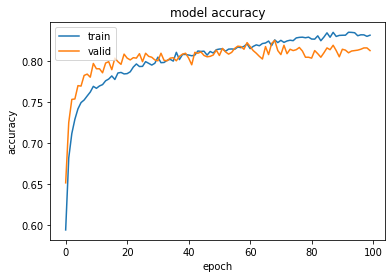

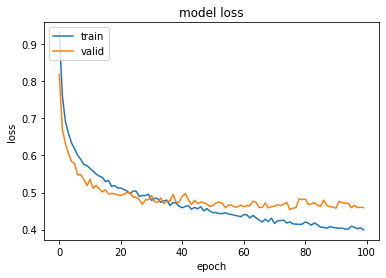

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


In [ ]:

scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

163/163 [==============================] - 2s 8ms/step - loss: 0.4630 - accuracy: 0.8113
Testing Accuracy: 81.13%

